# Loading Custom Models

### Loading a Pre-trained Model from Disk

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Loading CIFAR-10 data

In [2]:
((trainX, trainY), (testX, testY)) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

In [4]:
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [5]:
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
              "dog", "frog", "horse", "ship", "truck"]

In [6]:
from google.colab import drive

drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [7]:
cd gdrive/My\ Drive/Colab\ Notebooks/dl_vision/day3

/content/gdrive/My Drive/Colab Notebooks/dl_vision/day3


Loading pre-trained network

In [8]:
model = load_model("convnet_weights.hdf5")

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                327690    
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 328,586
Trainable params: 328,586
Non-trainable params: 0
_________________________________________________________________


Pass a sample image to the model to perform the prediction

In [10]:
model.evaluate(testX, testY, batch_size=32, verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 1.2988 - accuracy: 0.5972


[1.2987830638885498, 0.5971999764442444]

Loop over the sample images

In [11]:
preds = model.predict(testX[:8], batch_size=8).argmax(axis=1)

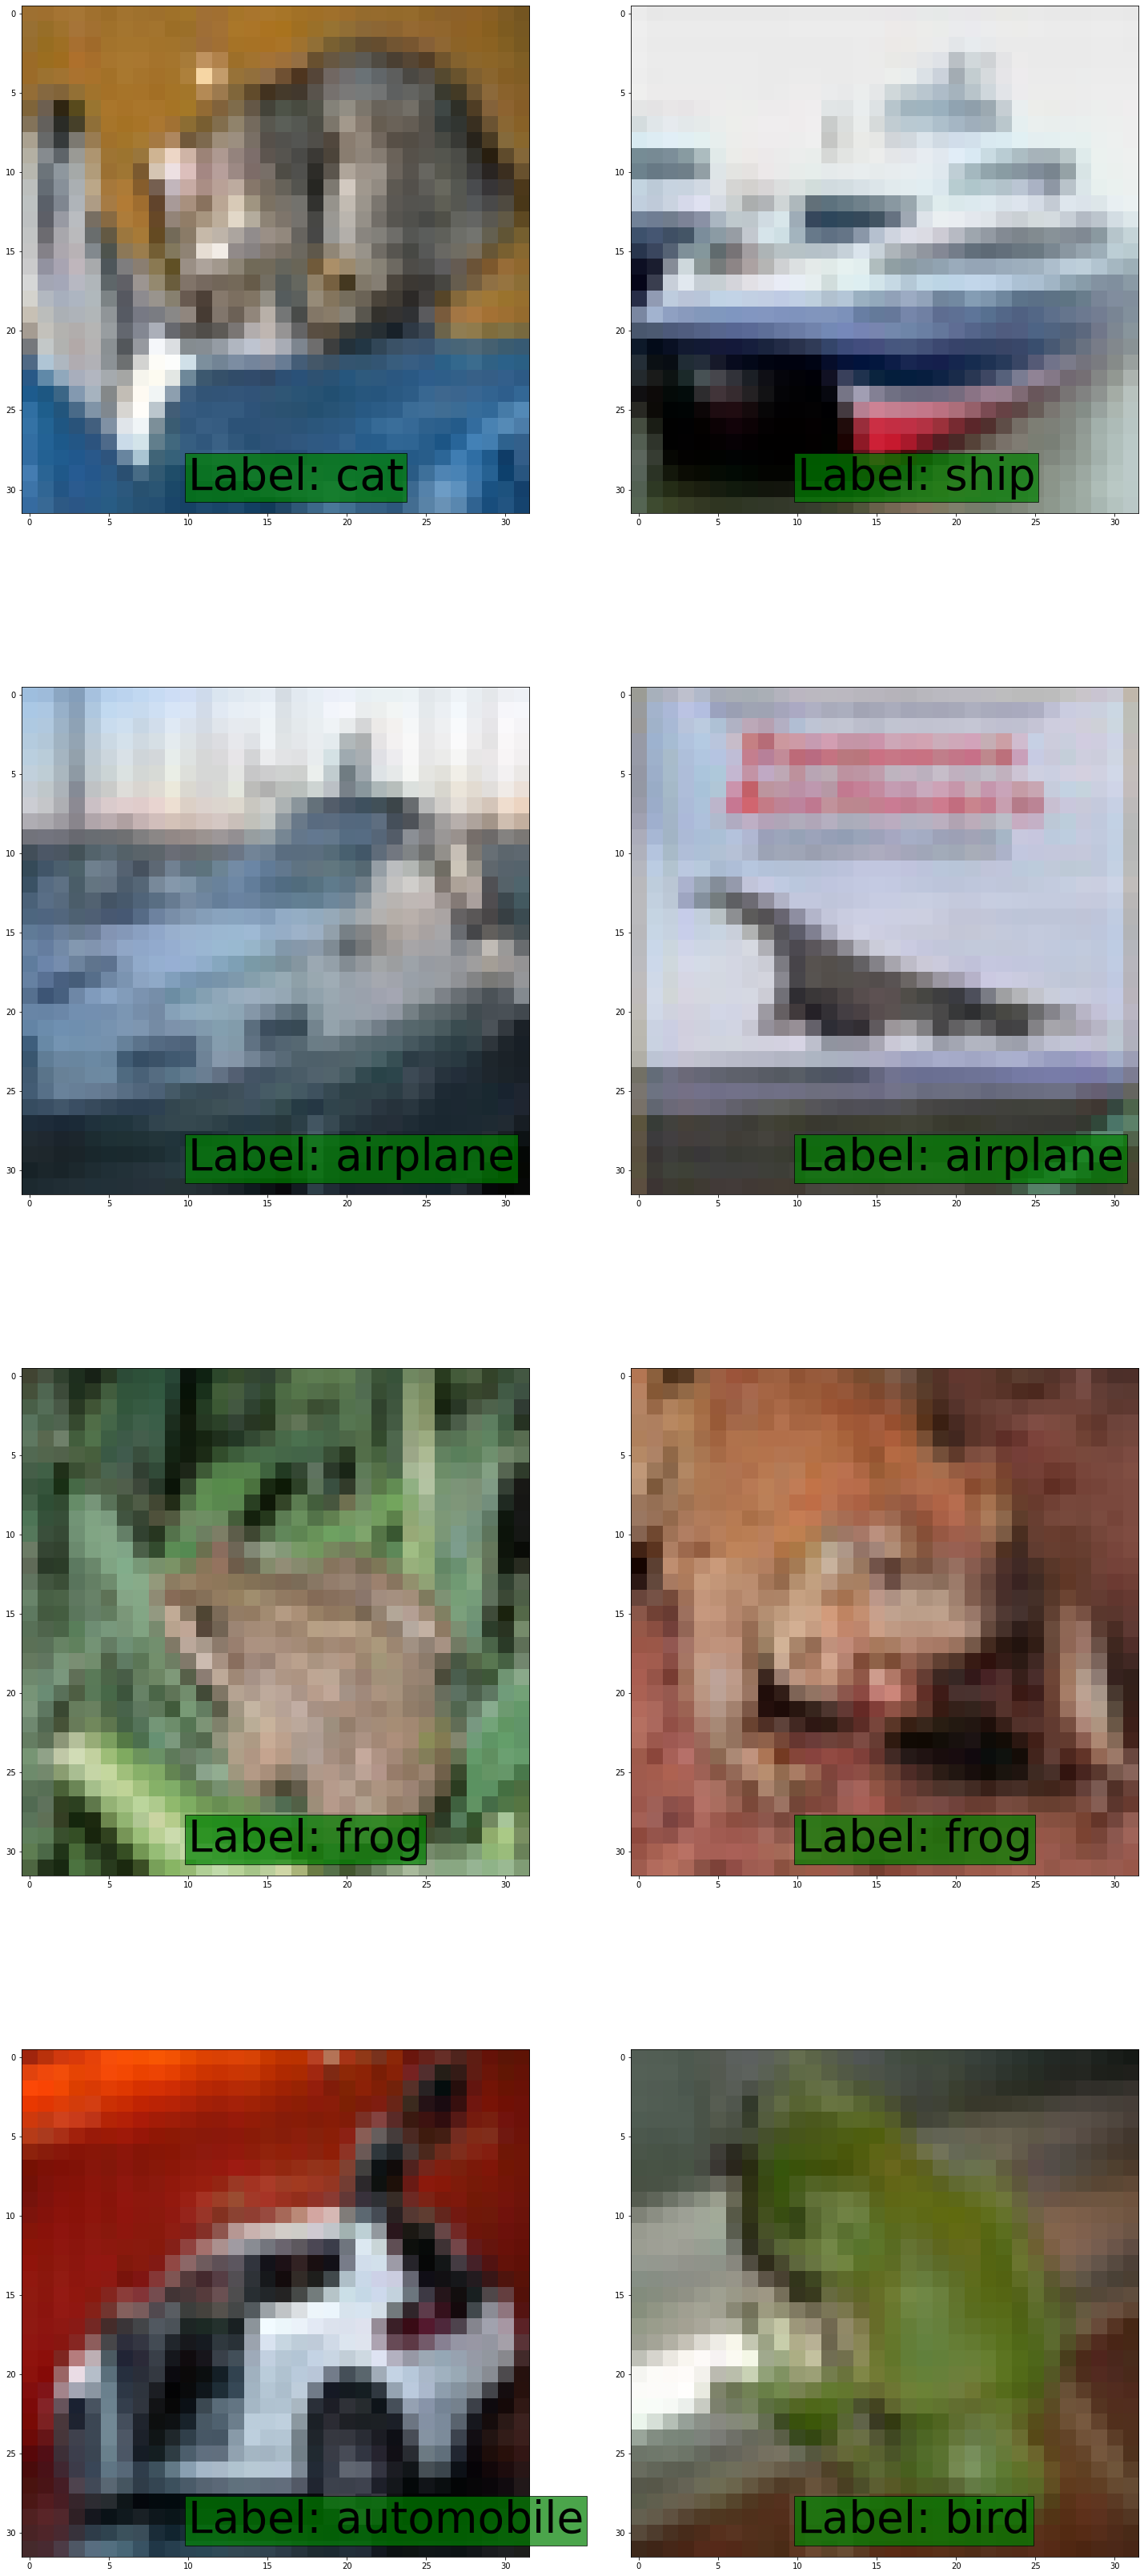

In [12]:
plt.figure(figsize=(25,60))

for (i, image) in enumerate(testX[:8]):
    plt.subplot(4, 2, i+1)
    plt.text(10, 30, "Label: {}".format(labelNames[preds[i]]), 
                 fontsize=55, bbox=dict(facecolor='green', alpha=0.7))
    
    plt.imshow(image)
    plt.grid(False)